# SIN260 - Sistemas Inteligentes
## Aprendizado de Máquina

Isabela Neves Drummond
<br>Flávio Belizário S. Mota
<hr>

O objetivo deste notebook jupyter é empregar alguns algoritmos de Aprendizado de Máquina em tarefas de classificação (aprendizado supervisionado) e agrupamento (aprendizado não supervisionado).

## O conjunto de dados

Nos exemplos dessa aula, empregaremos o conjunto de dados Iris. Este é um conjunto de dados famoso que contêm medidas de comprimento e largura das sépalas e pétalas de 150 flores de íris de três espécies diferentes: íris-Setosa, Íris-Versicolor e Íris-Virginica. Existem 50 amostras para cada uma das espécies.  

<p><a href="https://commons.wikimedia.org/wiki/File:Flores_de_%C3%8Dris.png#/media/Ficheiro:Flores_de_Íris.png"><img src="https://upload.wikimedia.org/wikipedia/commons/c/cb/Flores_de_%C3%8Dris.png" alt="Flores de Íris.png" width="640" height="321"></a>
<br> Por <a href="//commons.wikimedia.org/wiki/User:Dcbmariano" title="User:Dcbmariano"&gt;Diego Mariano&lt;/a&gt; - &lt;span class="int-own-work" lang="pt"&gt;Obra do próprio&lt;/span&gt;, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=114511020">Wikipedia</a></p>

Vamos importar o conjunto de dados por utilizando o repositório da UCI, que é um grande repositório de conjuntos de dados que podem ser empregados no aprendizado de máquina.

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

### Importando o conjunto de dados

Utilizaremos a biblioteca pandas para carregar os dados do conjunto Iris. Em seguida, vamos exibir os 5 primeiros registros desse conjunto:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Cada registro desse conjunto corresponde a uma flor. Os atributos das colunas 0 e 1 são as medidas de comprimento e largura da sépala. Os atributos 2 e 3 representam o comprimento e largura da pétala. Por fim, o atributo 4 representa a espécie da flor, ou seja, as classes do nosso problema.

Para melhorar a leitura desses dados, vamos renomear essas colunas:

In [ ]:
df.rename(columns = {0:'comprimento_sepala', 
                     1:'largura_sepala', 
                     2:'comprimento_petala', 
                     3:'largura_petala',
                     4:'classe'}, inplace = True)
df

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Vamos gerar um gráfico de dispersão para visualizar como esses atributos estão relacionados (ou não):

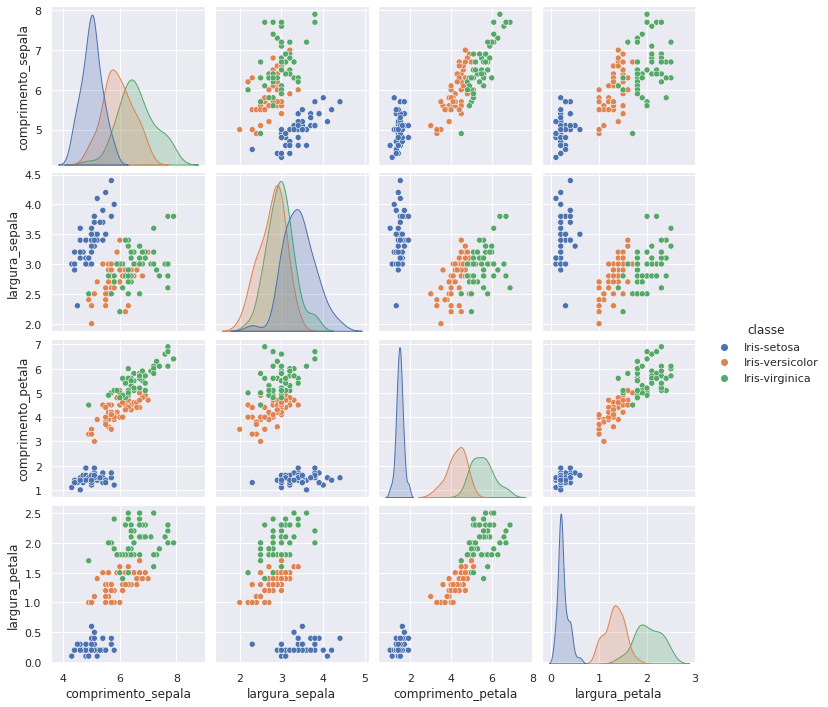

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(df[['comprimento_sepala', 
                 'largura_sepala', 
                 'comprimento_petala', 
                 'largura_petala', 
                 'classe']],
             hue="classe", diag_kind="kde")

Através dos gráficos de dispersão, podemos perceber que algumas combinações de atributos resultam em distribuições onde é mais fácil encontrar as divisões entre as classes. 

Na maioria das combinações, a classe Iris-setosa é a que se separa mais facilmente das outras duas classes. Iris-versicolor e Iris-virginica têm valores que se sobrepõem independente da combinação de atributos. Isso nos diz que essas duas classes serão mais dificeis de separar do que a classe Iris-setosa.

O conjunto é formado por 4 atributos. Isso significa que nosso problema está distribuido espacialmente em 4 dimensões... Visualizar isso, para nós que somos seres contidos em um espaço de 3 dimensões, exige certa abstração que dificulta entender como separar as classes do problema. Sendo assim, por uma facilidade (e para que a aula fique mais interessante), vamos considerar apenas 2 atributos do conjunto, nesse caso a lagura e comprimento da pétala.

## Criando um modelo de classificação

Definidos os atributos que serão empregados, vamos criar nosso modelo de classificação. Nessa aula, iremos utilizar o Naïve Bayes. Esse é um modelo relativamente simples que não necessita de tantos parâmetros de configuração para funcionar.

### Preparando o conjunto

Por se tratar de um problema de aprendizado supervisionado, o objetivo é a identificação de uma classe previamente informada. Sendo assim, iremos dividir nosso conjunto entre as amostras, que chamaremos de X, e os rótulos, que chamaremos de y:

In [ ]:
X = df[['comprimento_petala', 
        'largura_petala']]
y = df['classe']
print("Variável X:", X)
print("Classes (y):", y)

Variável X:      comprimento_petala  largura_petala
0                   1.4             0.2
1                   1.4             0.2
2                   1.3             0.2
3                   1.5             0.2
4                   1.4             0.2
..                  ...             ...
145                 5.2             2.3
146                 5.0             1.9
147                 5.2             2.0
148                 5.4             2.3
149                 5.1             1.8

[150 rows x 2 columns]
Classes (y): 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: classe, Length: 150, dtype: object


Agora temos a variável X que armazena nossos 2 atributos e a variável y com os valores das respectivas classes.

A variável y armazena os valores das classes no formato textual. Entretanto, algoritmos de aprendizado de máquina são modelos computacionais que manipulam informações numéricas. Dessa forma, precisamos realizar a codificação dos valores textuais para valores numéricos:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Após a transformação, as classes Iris-setosa, Iris-versicolor e Iris-virginica são representadas pelos valores 0, 1 e 2, respectivamente.

### Separando o conjunto

Agora, iremos separar nosso conjunto em amostras de treinamento e teste. Essa etapa é importante para que seja possível validar se o modelo gerado é capaz de executar bem a classificação dos dados.

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.8, random_state=42)

A função executada gera uma divisão na qual 80% do conjunto compõe as amostras de treinamento e 20% as amostras de teste.

In [ ]:
print("Quantidade de amostras de treinamento:", X_treino.shape[0])
print("Quantidade de amostras de teste:", X_teste.shape[0])

Quantidade de amostras de treinamento: 120
Quantidade de amostras de teste: 30


### Treinando e avaliando o modelo

Vamos agora treinar um modelo de classificação que permita identificar as classes do nosso problema.

Utilizaremos o algoritmo Naïve Bayes. Podemos treinar o modelo, utilizando a biblioteca sklearn, através do método fit(), que espera as amostras do conjunto de treinamento com seus respectivos rótulos. Em seguida, vamos utilizar o método score() que quantifica o acerto do modelo na fase de treinamento:   

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_treino.values, y_treino)
nb.score(X_treino.values, y_treino)

0.95

Esse valor indica que o modelo é capaz de encontrar corretamente a classe para 95% das amostras do conjunto de treinamento.

Depois da etapa de treinamento, podemos utilizar o modelo para prever os valores de classe para as amostras de teste e assim verificar quanto ele acerta com amostras que ainda não foram apresentadas. Para isso, utilizaremos o método predict(), que retorna os valores previstos, e a métrica de acurácia:

In [ ]:
from sklearn.metrics import accuracy_score
y_previsto = nb.predict(X_teste.values)
accuracy_score(y_teste, y_previsto)

1.0

Essa pontuação nos diz que o modelo tem um acerto de 100% para os dados de teste.

Vamos visualizar essa classificação através de um gráfico:

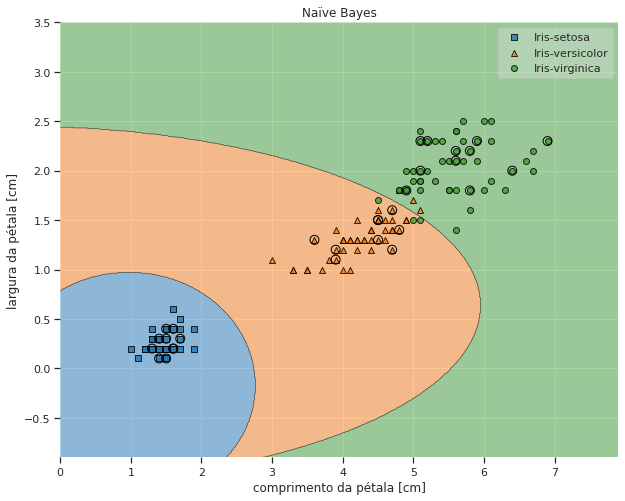

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))

ax = plot_decision_regions(X.values, y, clf=nb, legend=2, 
                      X_highlight=X_teste.values)

# Adding axes annotations
plt.xlabel('comprimento da pétala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.title('Naïve Bayes')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
           framealpha=0.3, scatterpoints=1)
plt.show()

Através da figura acima, é possível verificar as fronteiras de decisão geradas pelo modelo. 

Para a classe Iris-setosa, todos os exemplos foram classificados corretamente. Entretando algumas das amostras das classes Iris-versicolor e Iris-virginica foram incorretamente classificadas porque o modelo não conseguiu criar uma fronteira de decisão que separa esses pontos.

Vamos analisar essa classificação com uma matriz de confusão. Ela é capaz de informar quantas amostras do conjunto foram corretamente associadas ao rótulo real:

Text(0.5, 1.0, 'Matriz de confusão - Naïve Bayes')

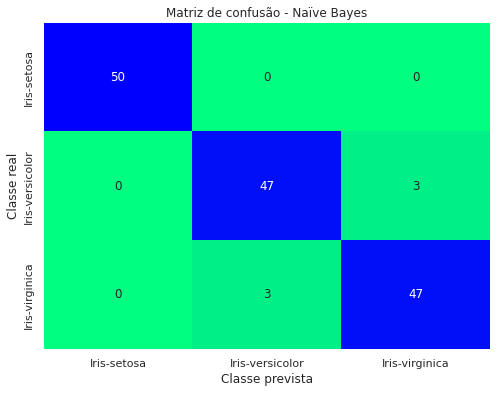

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_previsto = nb.predict(X.values)
cm = confusion_matrix(y, y_previsto)

plt.figure(figsize = (8,6))

sn.heatmap(cm, 
           annot=True, 
           cmap= 'winter_r', 
           xticklabels = ['Iris-setosa','Iris-versicolor','Iris-virginica'],
           yticklabels = ['Iris-setosa','Iris-versicolor','Iris-virginica'],
           cbar=False)
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.title('Matriz de confusão - Naïve Bayes')

Através da matriz de confusão, podemos notar que o modelo classifica incorretamente 3 amostras para cada classe de Iris-versicolor e Iris-virginica. 

Isso mostra que, apesar de obter uma boa acurácia, o modelo não consegue acertar totalmente. Para nosso exemplo isso não é exatamente um problema, mas em aplicações reais, errar a identificação de uma determinada classe pode não ser tolerado para a finalidade pretendida. Nesses casos, pode ser necessário reavaliar o modelo que foi empregado, afim de encontrar um que se ajuste melhor aos dados, ou ainda buscar por melhores representações do dado para o contexto.

## Criando um modelo de agrupamento

A partir de agora, utilizaremos o mesmo conjunto de dados porém iremos empregar uma tarefa de aprendizado não supervisionado, o agrupamento.

O agrupamento é realizado quando não temos o rótulo das classes do conjunto de dados. No nosso caso, o conjunto Iris possui os rótulos de cada amostra. Vamos utilizar esses rótulos apenas como uma forma de validação do exemplo. O modelo irá aprender sem receber a informação dos rótulos.

Para isso, utilizaremos o algoritmo K-médias. K-médias é um algoritmo baseado em centróides, ou um algoritmo baseado em distância, onde calculamos as distâncias para atribuir uma amostra a um grupo. No K-médias, cada grupo está associado a um centroide.

Em termos gerais, o algoritmo faz o seguinte:


1.   Escolha o número de grupos k
2.   Selecione k amostras aleatórias dos dados como centroides
3.   Atribua todas as amostras ao centróide do grupo mais próximo
4.   Recalcule os centróides dos grupos recém-formados     
5.   Repita os passos 3 e 4

### Mas como definir os k grupos?

O número de grupos pode ser um chute. Mas existem formas de encontrar um valor k que seja próximo do ideal. Uma das técnicas mais utilizadas é a técnica do cotovelo.

A ideia é treinar vários modelos do K-médias com valores diferentes de k. Depois, gerar um gráfico mostrando o valor de inércia do modelo pelo número de k. A inércia é a soma das distâncias quadradas das amostras até o centro do grupo mais próximo. 

Aqueles valores no "cotovelo" do gráfico são possivelmente os melhores valores de k.

Vamos ver a seguir essa abordagem:

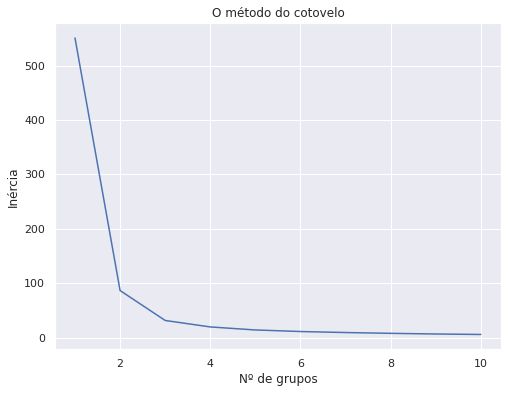

In [ ]:
from sklearn.cluster import KMeans
vetor_inercia = []

for i in range(1, 11):
    kmedias = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmedias.fit(X)
    vetor_inercia.append(kmedias.inertia_)

plt.figure(figsize = (8,6)) 
plt.plot(range(1, 11), vetor_inercia)
plt.title('O método do cotovelo')
plt.xlabel('Nº de grupos')
plt.ylabel('Inércia')
plt.show()

Pelo gráfico, vemos que os melhores valores possíveis para o modelo seriam 2 ou 3. Já temos o conhecimento de que o nosso conjunto possui 3 classes diferentes, por isso usaremos k=3. Se estivessemos lidando com um problema desconhecido, poderiamos testar k=2 e k=3 para avaliarmos qual valor de k produziria grupos mais adequados.

### Agrupando com o K-médias

Vamos então gerar nosso modelo de agrupamento com valor de k = 3.

In [ ]:
kmedias = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmedias = kmedias.fit_predict(X)
y_kmedias

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Agora, temos um valor de grupo associado a cada amostra do nosso conjunto de dados. Vamos visualizar as amostras e os respectivos grupos/centroides definidos pelo modelo:

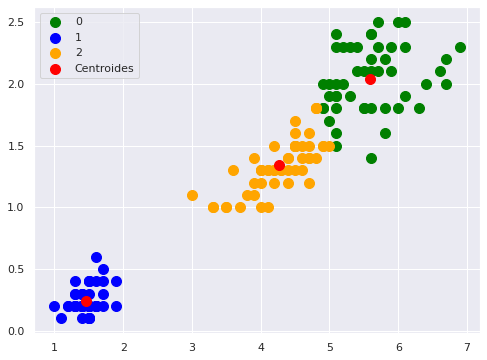

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(X[y_kmedias == 0]["comprimento_petala"], X[y_kmedias == 0]["largura_petala"], s = 100, c = 'green', label='0')
plt.scatter(X[y_kmedias == 1]["comprimento_petala"], X[y_kmedias == 1]["largura_petala"], s = 100, c = 'blue', label='1')
plt.scatter(X[y_kmedias == 2]["comprimento_petala"], X[y_kmedias == 2]["largura_petala"], s = 100, c = 'orange', label='2')

# Centro dos grupos
plt.scatter(kmedias.cluster_centers_[:, 0], kmedias.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides')

plt.legend()

Como sabemos as classes do nosso problema, podemos rotular cada grupo gerado com os nomes dessas classes, sendo que o grupo rotulado como 0 é a classe Iris-virginica, o grupo 1 representa a classe de Iris-setosa e o grupo 2 as flores Iris-versicolor:

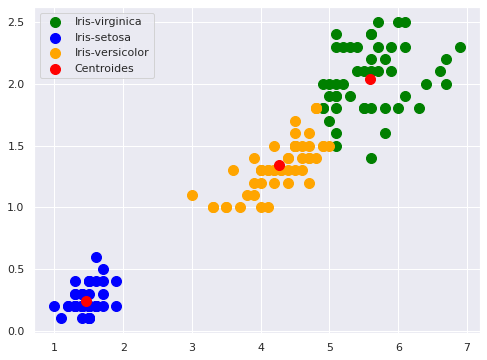

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(X[y_kmedias == 0]["comprimento_petala"], X[y_kmedias == 0]["largura_petala"], s = 100, c = 'green', label='Iris-virginica')
plt.scatter(X[y_kmedias == 1]["comprimento_petala"], X[y_kmedias == 1]["largura_petala"], s = 100, c = 'blue', label='Iris-setosa')
plt.scatter(X[y_kmedias == 2]["comprimento_petala"], X[y_kmedias == 2]["largura_petala"], s = 100, c = 'orange', label='Iris-versicolor')

# Centro dos grupos
plt.scatter(kmedias.cluster_centers_[:, 0], kmedias.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides')

plt.legend()

Nesse exemplo, conseguimos também comparar quais os "grupos" originais com os grupos encontrados pelo modelo:

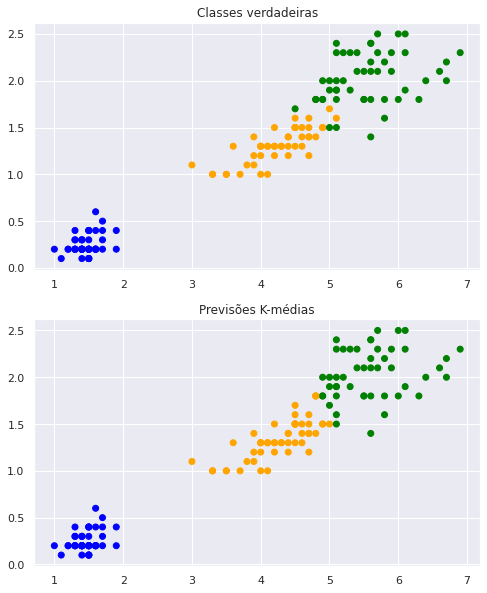

In [ ]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

ax[0].scatter(X['comprimento_petala'], X['largura_petala'], c=y, cmap=ListedColormap(['blue', 'orange', 'green']))
ax[0].title.set_text('Classes verdadeiras')
ax[1].scatter(X['comprimento_petala'], X['largura_petala'], c=y_kmedias, cmap=ListedColormap(['green', 'blue', 'orange']))
ax[1].title.set_text('Previsões K-médias')

Diferente da classificação, no agrupamento não existe uma forma de medir o quanto o modelo acerta ou erra, dado que o valor de classe real não existe. No entanto, é possível empregar medidas que avaliam quão bem formados os grupos estão. Essas medidas avaliam, por exemplo, quão próxima uma amostra está das outras amostras associadas a um mesmo grupo e quão distante ela está das amostras de um outro grupo.

## Aprendizado Supervisionado com Redes Neurais

Vamos realizar a tarefa de classificação dos dados do conjunto Iris, mas agora empregando uma rede neural, mais especificamente um Perceptron Multicamadas (MLP).

### Ajustando os dados

Redes Neurais são muito suscetíveis aos valores de entrada da rede. Caso eles estejam em escalas muito diferentes, a rede terá problemas para conseguir classificar os dados. Sendo assim, antes de empregar o MLP, teremos que aplicar uma padronização nos dados de entrada:

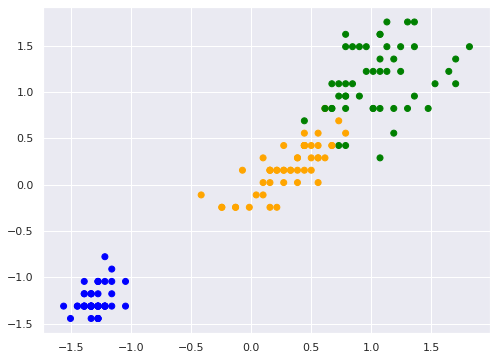

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_treino)
X_treino_padronizado = sc.transform(X_treino)
X_teste_padronizado = sc.transform(X_teste)

plt.figure(figsize = (8,6))
plt.scatter(X_treino_padronizado[:, 0], X_treino_padronizado[:, 1], c=y_treino, cmap=ListedColormap(['blue', 'orange', 'green']))
plt.scatter(X_teste_padronizado[:, 0], X_teste_padronizado[:, 1], c=y_teste, cmap=ListedColormap(['blue', 'orange', 'green']))

### Treinando e avaliando o modelo

Com os dados já padronizados, podemos treinar o MLP. 

Esse é um modelo que aceita um grande número de parâmetros de configuração (23, para ser mais exato na implementação da sci-kit). Esses parâmetros também são conhecidos como hiperparâmetros, pois influenciam o processo de aprendizado da rede.

O objetivo do nosso exemplo é mostrar o funcionamento da rede com um conjunto simples de dados, portanto não vamos nos prender nos detalhes dos hiperparâmetros (existe uma linha de pesquisa só para isso). 

No nosso caso, vamos configurar o parâmetro que define a taxa de aprendizagem do modelo, o alfa (`alhpa`), e o parâmetro `solver`, que define qual algoritmo será empregado na atualização dos pesos da rede. O parâmetro random_state define apenas uma forma de controlar o experimento (para que todos nós possamos obter resultados parecidos):

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=42)
mlp.fit(X_treino_padronizado, y_treino)
y_previsto_mlp = mlp.predict(X_teste_padronizado)
accuracy_score(y_teste, y_previsto_mlp)

0.9666666666666667

A acurácia do MLP com os dados de teste é de 96%. 

Podemos gerar os gráficos com as fronteiras de decisão geradas pelo MLP, bem como a matriz de confusão: 

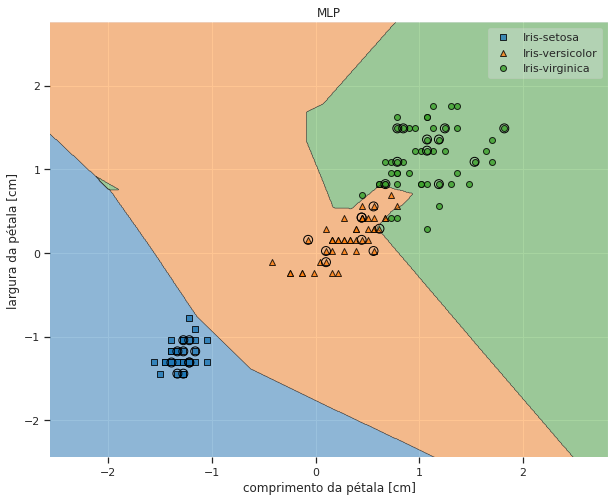

In [ ]:
plt.figure(figsize = (10,8))
ax = plot_decision_regions(sc.transform(X), y, clf=mlp, legend=2,
                           X_highlight=X_teste_padronizado)


plt.xlabel('comprimento da pétala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.title('MLP')
ax.legend(handles, 
          ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
           framealpha=0.3, scatterpoints=1)
plt.show()

Text(0.5, 1.0, 'Matriz de confusão - MLP')

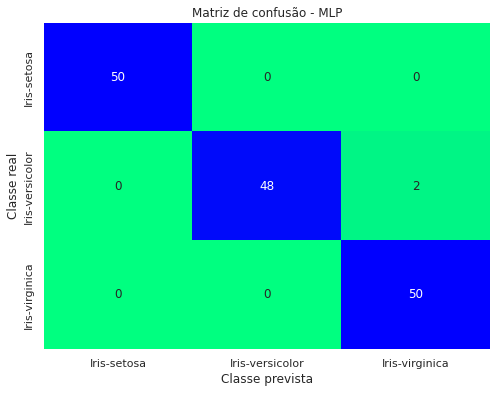

In [ ]:
y_previsto = mlp.predict(sc.transform(X))
cm = confusion_matrix(y, y_previsto)

plt.figure(figsize = (8,6))

sn.heatmap(cm, 
           annot=True, 
           cmap= 'winter_r', 
           xticklabels = ['Iris-setosa','Iris-versicolor','Iris-virginica'],
           yticklabels = ['Iris-setosa','Iris-versicolor','Iris-virginica'],
           cbar=False)
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.title('Matriz de confusão - MLP')

Podemos notar que as fronteiras de decisão geradas pelo MLP são diferentes daquelas geradas pelo Naïve Bayes. Isso se deve ao funcionamento do modelo, que tenta traçar diferentes retas no hiperplano no qual os dados estão espacialmente distribuídos. Dessa forma, ele consegue gerar fronteiras de decisão mais elaboradas e, por consequência, diferenciar completamente as classes de flores Iris-setosa e Iris-virginica. 

Ainda assim, o modelo não consegue separar totalmente os exemplos da classe Iris-versicolor, como podemos perceber pela matriz de confusão.

## Aprendizado Não Supervisionado com Redes Neurais

Podmeos empregar um mapa auto-organizável (SOM) para realizar o agrupamento dos dados do conjunto Iris. Entretanto, o SOM não existe na biblioteca padrão da scikit-learn.

Utilizaremos uma biblioteca desenvolvida nos padrões da sklearn que disponibiliza uma implementação do modelo SOM:

In [ ]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Agora que temos a biblioteca, vamos criar o modelo.

Como parâmetros desse algoritmo, temos `m` e `n`, que definem a matriz de representação do mapa, ou seja, a quantidade de neurônios. Definimos também o valor de `dim`, que nos diz quantas dimensões tem os dados de entrada, ou seja, a quantidade de atributos. Por fim, configuramos o `sigma`, que é a taxa de aprendizado empregada na atualização dos pesos do SOM. O parâmetro random_state define apenas uma forma de controlar o experimento (para que todos nós possamos obter resultados parecidos): 

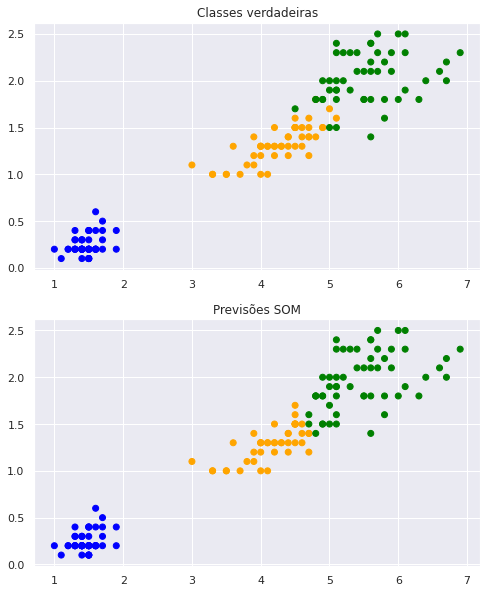

In [ ]:
from sklearn_som.som import SOM
som = SOM(m=3, n=1, dim=2, sigma=0.6, random_state=42)
som.fit(X.values)
y_som = som.predict(X.values)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

ax[0].scatter(X.values[:, 0], X.values[:, 1], c=y, cmap=ListedColormap(['blue', 'orange', 'green']))
ax[0].title.set_text('Classes verdadeiras')
ax[1].scatter(X.values[:, 0], X.values[:, 1], c=y_som, cmap=ListedColormap(['orange', 'green', 'blue']))
ax[1].title.set_text('Previsões SOM')

## Fontes:

1. [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
2. [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
3. [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
4. [sklearn-som](https://pypi.org/project/sklearn-som/)